# Lecture 7: MCMC

## Instructor： 胡传鹏（博士）[Dr. Hu Chuan-Peng]

### 南京师范大学心理学院[School of Psychology, Nanjing Normal University]

课前回顾: 

- 贝叶斯公式中分母的意义;


- 计算贝叶斯公式中分母的难度;


- 理解后验分布及其计算

## $ p(\theta|data) = \frac{p(data|\theta)p(\theta)}{\pmb {p(data)}}$

## $\pmb{p(\theta|data)} = \frac{p(data|\theta)p(\theta)}{p(data)}$ 

## Part 1: The idea of approximation

**以探究地球海水覆盖率为例。**

- 假设我们在获得数据以前的**先验**认为：地球海水覆盖率$\theta$为0-1的可能是相等的。$\theta \sim uniform(0,1)$

- 之后，假设我们获得数据：抛地球仪9次，其中6次海面朝上。

- 在获得数据的同时，我们以二项分布函数作为**似然函数**。

**我们该如何计算后验分布**

第一个方法是利用贝叶斯公式$p(\theta|data) = \frac{p(data|\theta)p(\theta)}{p(data)}$ 求出后验分布的解析解

但是问题在于

1.求积分往往是很难的，并且有些积分可能没有解析解。
$P(data) =\int_{\theta}^{} p(data,\theta) =\int_{\theta}^{} p(data|\theta)p(\theta)d\theta$



2.若后验分布比较复杂，即使获得后验分布，也难以计算期望值。
$E(\theta) =\int_{\theta}^{} \theta p(\theta|data) d\theta$

因此，我们可以采用第二种方法，近似求解算法

### Grid approximation

最简单的近似方法就是网格近似。

虽然大多数参数都是连续的，能够接受无穷多的值，但只要考虑有限的参数值，我们就可以很好地近似连续参数的后验分布

In [2]:
# numpy 是专门用于数组运算的包
import numpy as np
# 从scipy.stats里载入分布函数
import scipy.stats as st
# matplotlib.pyplot 是专门用于画图的包
import matplotlib.pyplot as plt
# seaborn是专门用于绘制统计数据的包
import seaborn as sns
# arviz 是专门用于贝叶斯统计会绘制的包
import arviz as az
# 从scipy.stats里载入正态分布和均匀分布
from scipy.stats import norm, uniform, binom
# 从math包输入计算平方根的公式
from math import sqrt
# matplotlib.patches是用来画几何图形的包
from matplotlib.patches import Circle

sns.set_style("white")

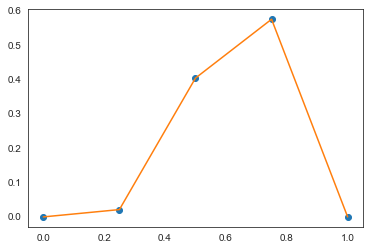

In [3]:
p_grid = np.linspace(0,1,5) #取5个离散的参数值

prior = np.repeat(1,5) #

likelihood = binom.pmf(6,9,p_grid)

unstd_posterior = likelihood*prior

posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(p_grid,posterior,'o')
plt.plot(p_grid,posterior)

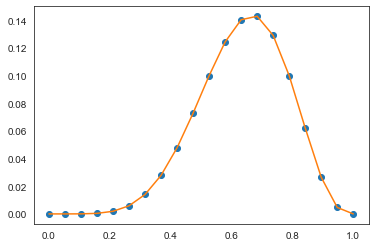

In [2]:
p_grid = np.linspace(0,1,20)

prior = np.repeat(1,20)

likelihood = binom.pmf(6,9,p_grid)

unstd_posterior = likelihood*prior

posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(p_grid,posterior,'o')
plt.plot(p_grid,posterior)

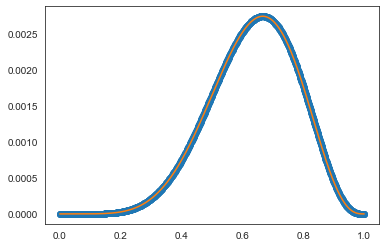

In [4]:
p_grid = np.linspace(0,1,1000)

prior = np.repeat(1,1000)

likelihood = binom.pmf(6,9,p_grid)

unstd_posterior = likelihood*prior

posterior = unstd_posterior/np.sum(unstd_posterior)

plt.plot(p_grid,posterior,'o')
plt.plot(p_grid,posterior)

grid approximation 其实就是将连续参数求积分的过程转化为离散参数求和的过程

当只存在一个参数时，grid approximation 时很有用的，但是当存在两个以上参数时， grid approximation就需要大量计算

若只存在一个参数是，grid approximation计算100个参数值，当存在2个参数时，就需要计算 $100^2=10000$个参数值

### 蒙特卡洛马尔科夫链(MCMC)

在计算具有多个参数的后验分布时，有一种有效的方法叫做蒙特卡洛马尔科夫链(MCMC)。

在介绍MCMC之前，我们先分别介绍一下蒙特卡洛方法(MC)和马尔科夫链(MC)。

#### 蒙特卡洛方法

蒙特卡洛方法来自于摩纳哥的蒙特卡洛赌场，许多纸牌类游戏需要计算其胜利的概率。

我们可以将蒙特卡洛理解为简单的模拟，通过模拟的情景来计算其发生的概率。

因为许多概率的计算往往是非常复杂甚至是无法直接计算的，但是我们可以通过计算机对期待发生的场景进行大量模拟，从而计算出其发生的概率，即：

$p(发生的概率)=\frac{模拟情形下事件发生的次数}{模拟的次数}$

我们使用一个经典的例子来说明蒙特卡罗方法的原理。

我们可以用蒙特卡洛方法来求出不规则图形的面积。

其基本原理为用大量的随机点铺满整块区域（该区域为规则图形），其中不规则图形的面积为
$\frac{落在不规则图形内的点的数量}{该区域内点的数量}*该区域面积$

我们该如何计算图形下半部分面积？

(-2.0, 2.0)

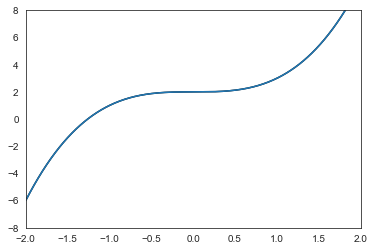

In [10]:
x = np.linspace(-2,2,400)

y = x**3+2

plt.plot(x,y,color = 'black')

n = 100000

uniform_x = uniform(-2 , 4).rvs(n)

uniform_y = uniform(-8, 16).rvs(n)


plt.plot(x,y)
plt.gca().axes.set_ylim(-8, 8)
plt.gca().axes.set_xlim(-2, 2)

图形下半部分面积为39.92064


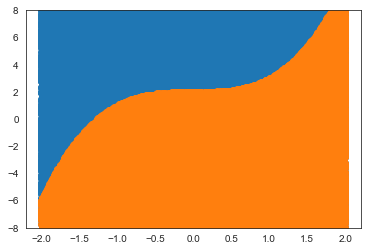

In [11]:


count = 0
target_x = []
target_y = []
for i in range(n):
    if  uniform_y[i] <= uniform_x[i]**3+2:
        count += 1
        target_x.append(uniform_x[i])
        target_y.append(uniform_y[i])


plt.scatter(uniform_x,uniform_y)
plt.scatter(target_x,target_y)
plt.gca().axes.set_ylim(-8, 8)


s = (count/n)*(4*16)

print(f"图形下半部分面积为{s}")


蒙特卡洛即一种模拟事情发生的方法

如果我们基于蒙特卡洛进行采样，一种常见的方法就是接受-拒绝采样。

该方法的核心就是为了求解一个不常见的分布p(x)，先构造一个常见的分布q(x)进行采样，然后按照一定的方法拒绝某些样本，以达到接近 p(x) 分布的目的，其中q(x)叫做 proposal distribution(建议分布)。

假定我们有一个不常见的概率分布$p(x)$，已知该分布的先验为均匀分布，似然函数已知，想要计算该参数的后验分布

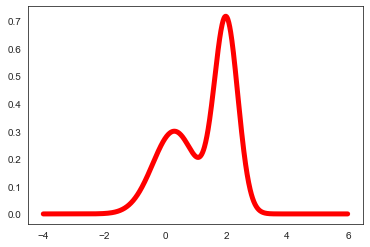

In [210]:


x = np.arange(-4, 6, 0.01)

def p(x):
    return (0.3 * np.exp(-(x - 0.3) ** 2) + 0.7 * np.exp(-(x - 2) ** 2 / 0.3)) 
plt.plot(x, p(x), color = 'r', lw = 5, label = 'p(x)')

In [211]:
norm_rv = norm(loc = 1.4, scale = 1.2)

c = 3

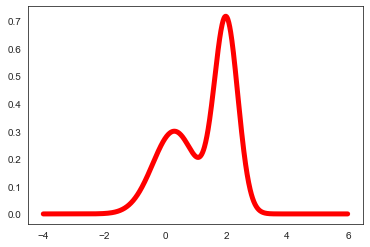

In [212]:
x = np.arange(-4, 6, 0.01)
plt.plot(x, p(x), color = 'r', lw = 5, label = 'p(x)')

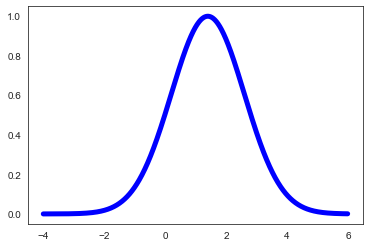

In [213]:
x = np.arange(-4, 6, 0.01)
plt.plot(x, c*norm_rv.pdf(x), color = 'b', lw = 5, label = 'c*g(x)')

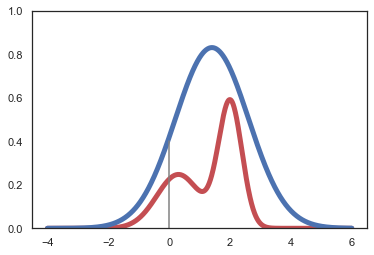

In [ ]:
x = np.arange(-4, 6, 0.01)

plt.plot(x, p(x), color = 'r', lw = 5, label = 'p(x)')

plt.plot(x, c*norm_rv.pdf(x), color = 'b', lw = 5, label = 'c*g(x)')

plt.gca().axes.set_ylim(0, 1)

plt.axvline(x=0, ymin = 0, ymax=0.4,color='grey')


step 1 sample from $ G $, get  $ Y $


step 2 sample from $ uniform(0,1) $ , get $ U $


step 3 if $ \frac{p(Y)}{ C g(Y)} \ge U $ , accept; else refuse

In [ ]:
uniform_rv = uniform( loc= 0, scale = 1)

sample = []

for i in range(100000):
# step 1 sample from $ G $, get  $ Y $
    Y = norm_rv.rvs(1)[0]
# step 2 sample from $ uniform(0,1) $ , get $ U $
    
    U = uniform_rv.rvs(1)[0]
# step 3 if $ \frac{p(Y)}{ C g(Y)} \ge U $ , accept; else refuse
    if p(Y) >= U * c * norm_rv.pdf(Y):
        sample.append(Y)    

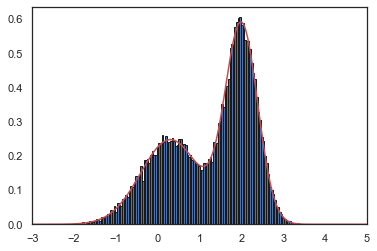

In [ ]:
x = np.arange(-3, 5, 0.01)

plt.gca().axes.set_xlim(-3, 5)

plt.plot(x, p(x), color = 'r')

plt.hist(sample, color = 'b', bins = 150, density = True, edgecolor = 'k')

plt.show()

使用接受-拒绝采样，我们可以解决一些概率分布不是常见的分布的时候，得到其采样集并用蒙特卡罗方法求和的目的。但是接受-拒绝采样也只能部分满足我们的需求，在很多时候我们还是很难得到我们的概率分布的样本集。比如：

- 对于一些二维分布p(x,y)，有时候我们只能得到条件分布p(x|y)和p(y|x)和,却很难得到二维分布p(x,y)一般形式，这时我们无法用接受-拒绝采样得到其样本集。

- 对于一些高维的复杂非常见分布p(x1,x2,...,xn)，我们要找到一个合适的q(x)和c非常困难。



从上面可以看出，要想将蒙特卡罗方法作为一个通用的采样模拟求和的方法，必须解决如何方便得到各种复杂概率分布的对应的采样样本集的问题。这就需要用到马尔科夫链。

#### 马尔科夫链

马尔科夫链假设某一时刻状态转移的概率只依赖于它的前一个状态。

$P(X_{t+1}|...X_{t−2},X_{t−1},X_{t})=P(X_{t+1}|X_{t})$

即，某一时间点的状态$x_n$在其下一个状态$x_{n+1}$的概率，仅仅取决于现在它所处的状态，而与它如何达到现在的状态无关。换句话说，该随机过程没有记忆。

无论初始状态如何，在经过n次状态转移过后，它处于某一个状态的概率是平稳分布的。

考虑以下这样的情况，我们在抛地球仪时，手指会指向陆地或者海洋，每一次抛掷就是一次状态转移。

状态转移的情况有以下四种：

- 陆地 -> 陆地
- 陆地 -> 海洋
- 海洋 -> 陆地
- 海洋 -> 海洋


状态转移矩阵为

\begin{bmatrix}
     &  陆地 & 海洋\\
陆地& 0.2 & 0.1\\
海洋 & 0.5 & 0.2\\ 
\end{bmatrix}

In [158]:
A = np.array([[0.75,0.25],
             [0.1,0.9]])
print(np.dot([0,1],A))

[0.1 0.9]


In [219]:
def get_matrix_pow(init ,matrix, n):
    if init[0]+init[1]==1:

        ret = init
        rets=[]
        rets= np.array(ret)
        for i in range(n):
            ret = np.dot(ret, matrix)
            rets=np.row_stack((rets,ret))
        plt.plot(range(n+1),rets[:,0],color='blue',label='land')
        plt.plot(range(n+1),rets[:,1],color='red',label='sea')
        plt.legend()
        plt.show()
        return ret
    else:
        raise ValueError("please make sure the sum of input equal to 1")

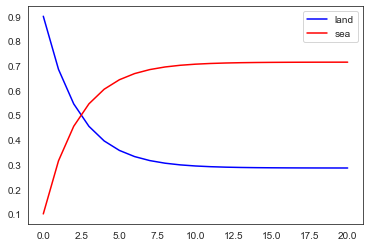

array([0.28582562, 0.71417438])

In [220]:
get_matrix_pow([0.9,0.1],A,n = 20)

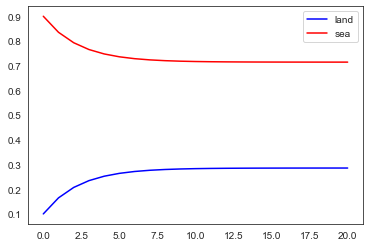

array([0.28568063, 0.71431937])

In [224]:
get_matrix_pow([0.1,0.9],A,n = 20)

我们可以观察到无论初始状态如何，只要状态转移一直持续下去，处在每个状态的概率会服从一个平稳分布。


假定我们可以得到我们需要采样样本的平稳分布所对应的马尔科夫链状态转移矩阵，那么我们就可以用马尔科夫链采样得到我们需要的样本集，进而进行蒙特卡罗模拟。

但是我们该如何得到马尔可夫链的状态转移矩阵呢？这就需要MCMC。

#### MCMC